Random Forest MSE: 0.8578448223781714
Linear Regression MSE: 0.4736459366581411


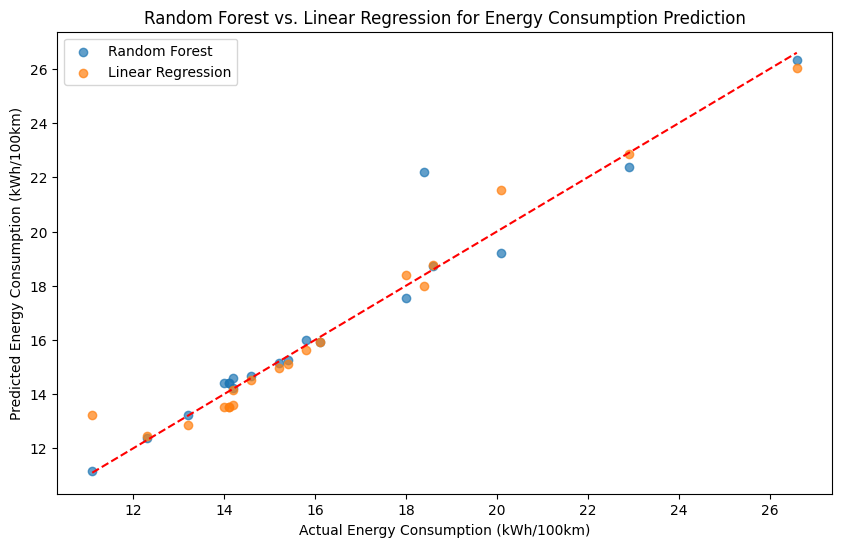

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and prepare the dataset
data = pd.read_csv("evsdata.csv")
X = data[["Battery_Capacity_kWh", "Range_km", "Weight_kg", "Max_Power_kW", "Top_Speed_kmh"]]  # Select features
y = data["Energy_Consumption_kWh_per_100km"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions and evaluate
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

print("Random Forest MSE:", rf_mse)
print("Linear Regression MSE:", lr_mse)

# Visualize the comparison
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, label="Random Forest", alpha=0.7)
plt.scatter(y_test, lr_predictions, label="Linear Regression", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Energy Consumption (kWh/100km)")
plt.ylabel("Predicted Energy Consumption (kWh/100km)")
plt.title("Random Forest vs. Linear Regression for Energy Consumption Prediction")
plt.legend()
plt.show()

In [4]:
data.shape

(95, 10)